## Problem
We have a dataset of neuron spike times (in seconds) recorded during an experiment. We want to estimate the mean firing rate of the neuron using the Monte Carlo method.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Steps
Generate random samples of spike times from the dataset.
Calculate the firing rate for each sample.
Estimate the mean firing rate by averaging the firing rates from all samples.

Estimated Mean Firing Rate: 1.01 Hz


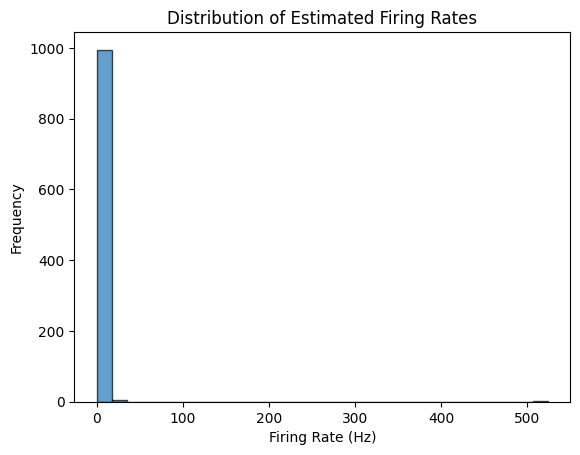

In [4]:
# Simulate some spike times (in seconds) for demonstration
np.random.seed(42)  # For reproducibility
spike_times = np.sort(np.random.uniform(0, 1000, 500))  # 500 spikes over 1000 seconds

# Define the Monte Carlo function
def monte_carlo_firing_rate(spike_times, num_samples=1000, sample_size=100):
    firing_rates = []
    
    for _ in range(num_samples):
        sample_spike_times = np.random.choice(spike_times, size=sample_size, replace=True)
        duration = sample_spike_times[-1] - sample_spike_times[0]
        firing_rate = sample_size / duration if duration > 0 else 0
        firing_rates.append(firing_rate)
    
    return np.mean(firing_rates), firing_rates

# Estimate the mean firing rate using Monte Carlo method
mean_firing_rate, firing_rates = monte_carlo_firing_rate(spike_times)

# Print the estimated mean firing rate
print(f"Estimated Mean Firing Rate: {mean_firing_rate:.2f} Hz")

# Plot the distribution of estimated firing rates
plt.hist(firing_rates, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Estimated Firing Rates')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('Frequency')
plt.show()


### Explanation
Simulate Spike Times: We simulate spike times for demonstration purposes. In practice, you would use actual spike time data from your experiments.

Monte Carlo Function:

We define monte_carlo_firing_rate which takes spike times, the number of samples, and the sample size as inputs.
For each sample, we randomly select spike times with replacement.
We calculate the firing rate for each sample and store it in a list.
Finally, we return the mean of the firing rates.
Estimate Mean Firing Rate:

We call the monte_carlo_firing_rate function to estimate the mean firing rate.
We print the estimated mean firing rate.
We plot the distribution of the estimated firing rates to visualize the variability.
This example demonstrates how the Monte Carlo method can be used to estimate the mean firing rate of a neuron using random sampling and basic statistical analysis in Python.

## Show as Heat map

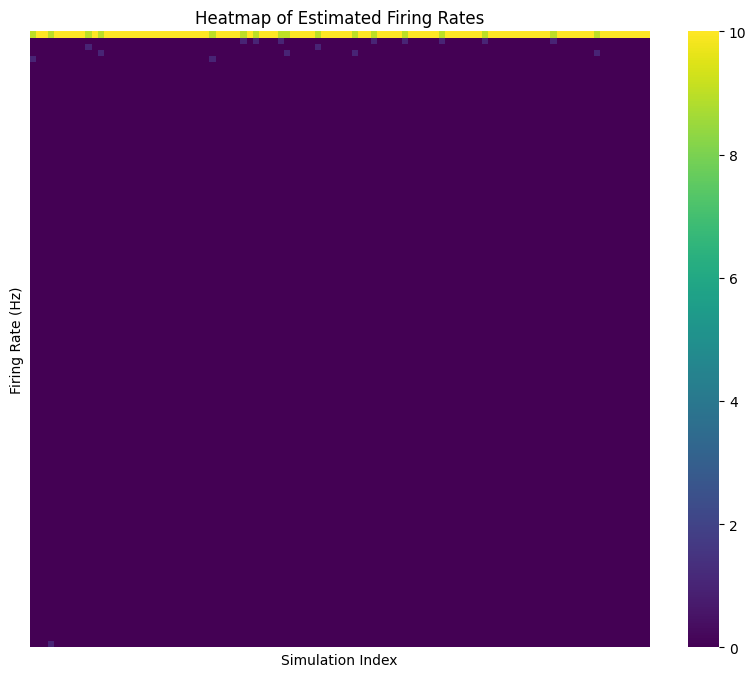

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate some spike times (in seconds) for demonstration
np.random.seed(42)  # For reproducibility
spike_times = np.sort(np.random.uniform(0, 1000, 500))  # 500 spikes over 1000 seconds

# Define the Monte Carlo function
def monte_carlo_firing_rate(spike_times, num_samples=1000, sample_size=100):
    firing_rates = []
    
    for _ in range(num_samples):
        sample_spike_times = np.random.choice(spike_times, size=sample_size, replace=True)
        duration = sample_spike_times[-1] - sample_spike_times[0]
        firing_rate = sample_size / duration if duration > 0 else 0
        firing_rates.append(firing_rate)
    
    return np.array(firing_rates)

# Estimate the mean firing rate using Monte Carlo method
firing_rates = monte_carlo_firing_rate(spike_times)

# Create heatmap data
heatmap_data, xedges, yedges = np.histogram2d(np.arange(len(firing_rates)), firing_rates, bins=(100, 100))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title('Heatmap of Estimated Firing Rates')
plt.xlabel('Simulation Index')
plt.ylabel('Firing Rate (Hz)')
plt.show()


## Explanation
Simulate Spike Times: We generate random spike times for demonstration.
Monte Carlo Function:
Similar to the previous example, we define monte_carlo_firing_rate to estimate firing rates using random sampling.
Instead of returning the mean firing rate, we return an array of firing rates.
Create Heatmap Data:
We use np.histogram2d to create a 2D histogram of the firing rates over the range of the simulation. This function bins the data and creates the counts needed for the heatmap.
Plot the Heatmap:
We use seaborn.heatmap to plot the heatmap. The x-axis represents the simulation index, and the y-axis represents the firing rate (Hz).
The cmap='viridis' argument specifies the color map for the heatmap.
This code will visualize the density of the firing rates as a heatmap, providing a different perspective on the variability of the estimated firing rates.